In [57]:
%load_ext autoreload
%autoreload 2
import networkx as nx
from cdt.metrics import *
import os
os.environ['R_HOME'] = 'C:\Program Files\R\R-4.3.1'  # replace with the actual R home directory
import rpy2.robjects as robjects
is_installed = robjects.r('''
if (!is.null(find.package("pcalg", quiet = TRUE))) {
  TRUE
} else {
  FALSE
}
''')
if is_installed[0]:
    print("pcalg is installed")
else:
    print("pcalg is NOT installed")
from clustercausal.utils.Utils import *

pcalg is installed


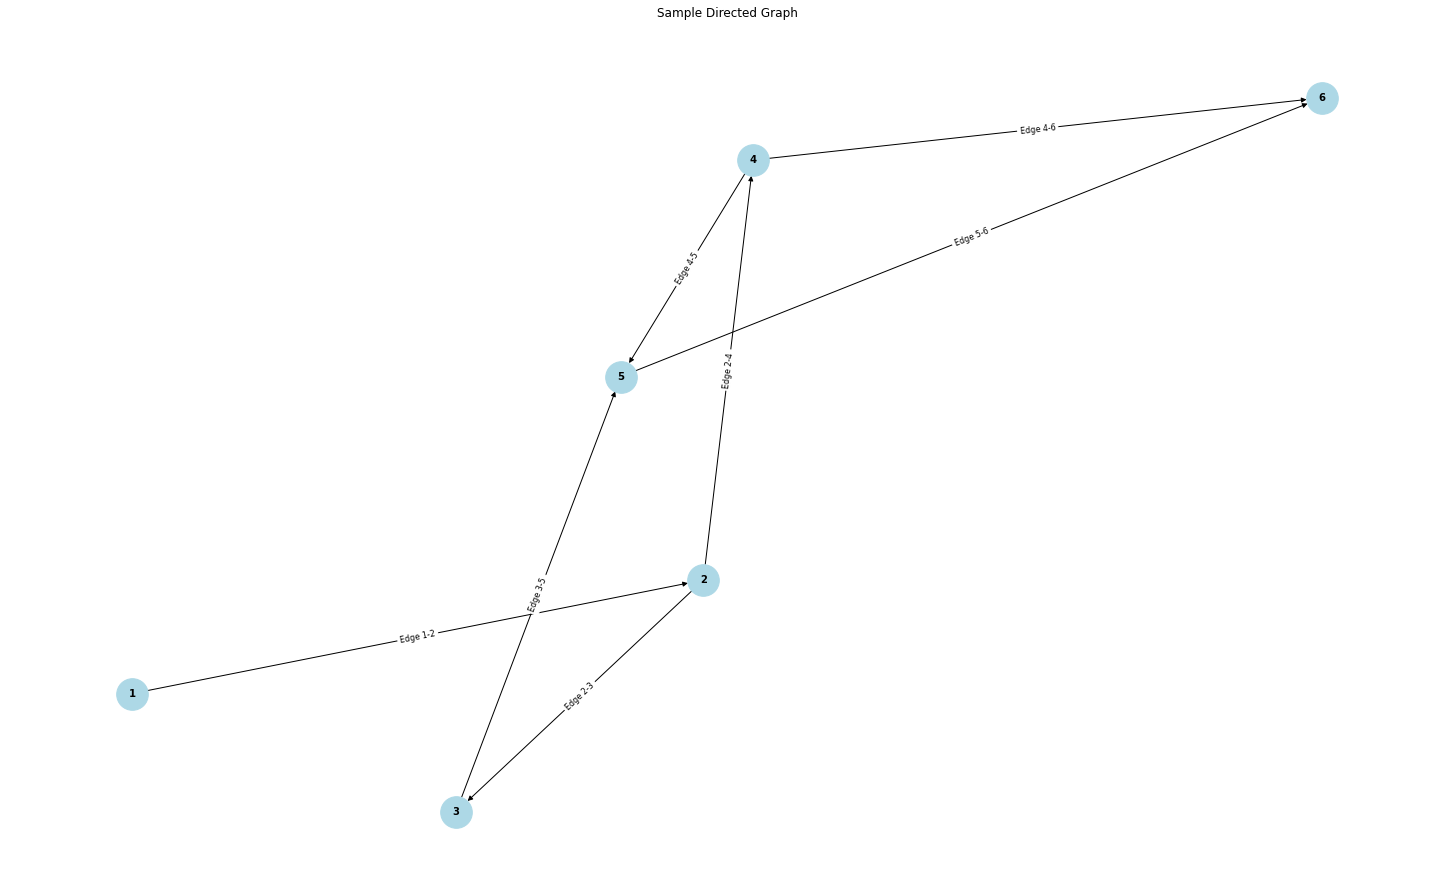

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(nodes)

# Add edges
edges = [(1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (5, 6)]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Layout algorithm
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(1, 2): 'Edge 1-2', (2, 3): 'Edge 2-3', (2, 4): 'Edge 2-4', (3, 5): 'Edge 3-5', (4, 5): 'Edge 4-5', (4, 6): 'Edge 4-6', (5, 6): 'Edge 5-6'}, font_size=8)
plt.title("Sample Directed Graph")
plt.show()

In [59]:
adj_matrix = nx.to_numpy_array(G, nodelist=nodes, dtype=int)
adj_matrix

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0]])

In [60]:
import os
os.environ['R_HOME'] = 'C:\Program Files\R\R-4.3.1'  # replace with the actual R home directory
import rpy2.robjects as robjects

In [61]:
pi = robjects.r['pi']
print(pi[0])

3.141592653589793


In [62]:
from rpy2.robjects.packages import importr
pcalg = importr('pcalg')

In [63]:
cpdag_adj = get_CPDAG(adj_matrix)
cpdag_adj

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [64]:
experiment_folder = 'clustercausal\experiments\_results\ClusterPC_30min\erdos_renyi_10_nodes_30_edges_3_clusters_mim'
base_est, cluster_est, cluster_dag = load_experiment_graphs(experiment_folder)
metrics = load_experiment(experiment_folder)

In [65]:
# cluster_dag.cdag_to_mpdag()
causalgraph = cluster_est
causalgraph.G.graph

array([[ 0,  0,  0,  1,  0, -1,  0, -1, -1,  0],
       [ 0,  0,  1,  1,  0, -1,  1, -1, -1, -1],
       [ 0, -1,  0,  0, -1,  0, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0, -1,  0, -1, -1,  0],
       [ 0,  0,  1,  0,  0,  0,  1, -1,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  1,  0,  0, -1],
       [ 0, -1, -1,  0, -1, -1,  0, -1, -1,  0],
       [ 1,  1,  0,  1,  1,  0,  1,  0,  1, -1],
       [ 1,  1,  0,  1,  0,  0,  1, -1,  0, -1],
       [ 0,  1,  0,  0,  0,  1,  0,  1,  1,  0]])

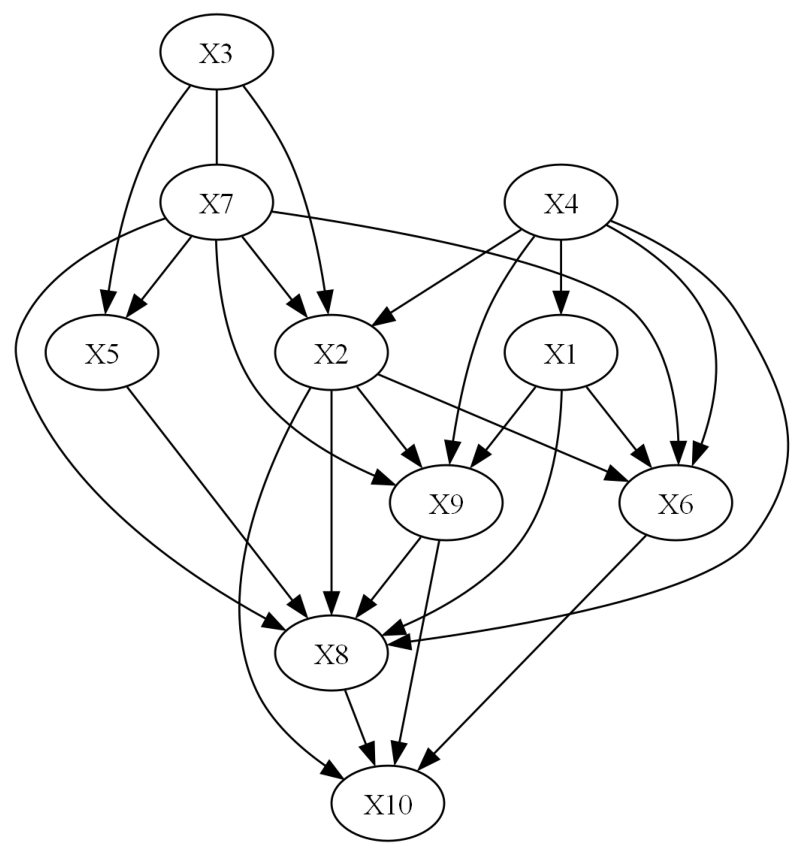

In [66]:
causalgraph.draw_pydot_graph()

In [67]:
nx_adjmat = causallearn_to_nx_adjmat(causalgraph.G.graph)
nx_adjmat

array([[0., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

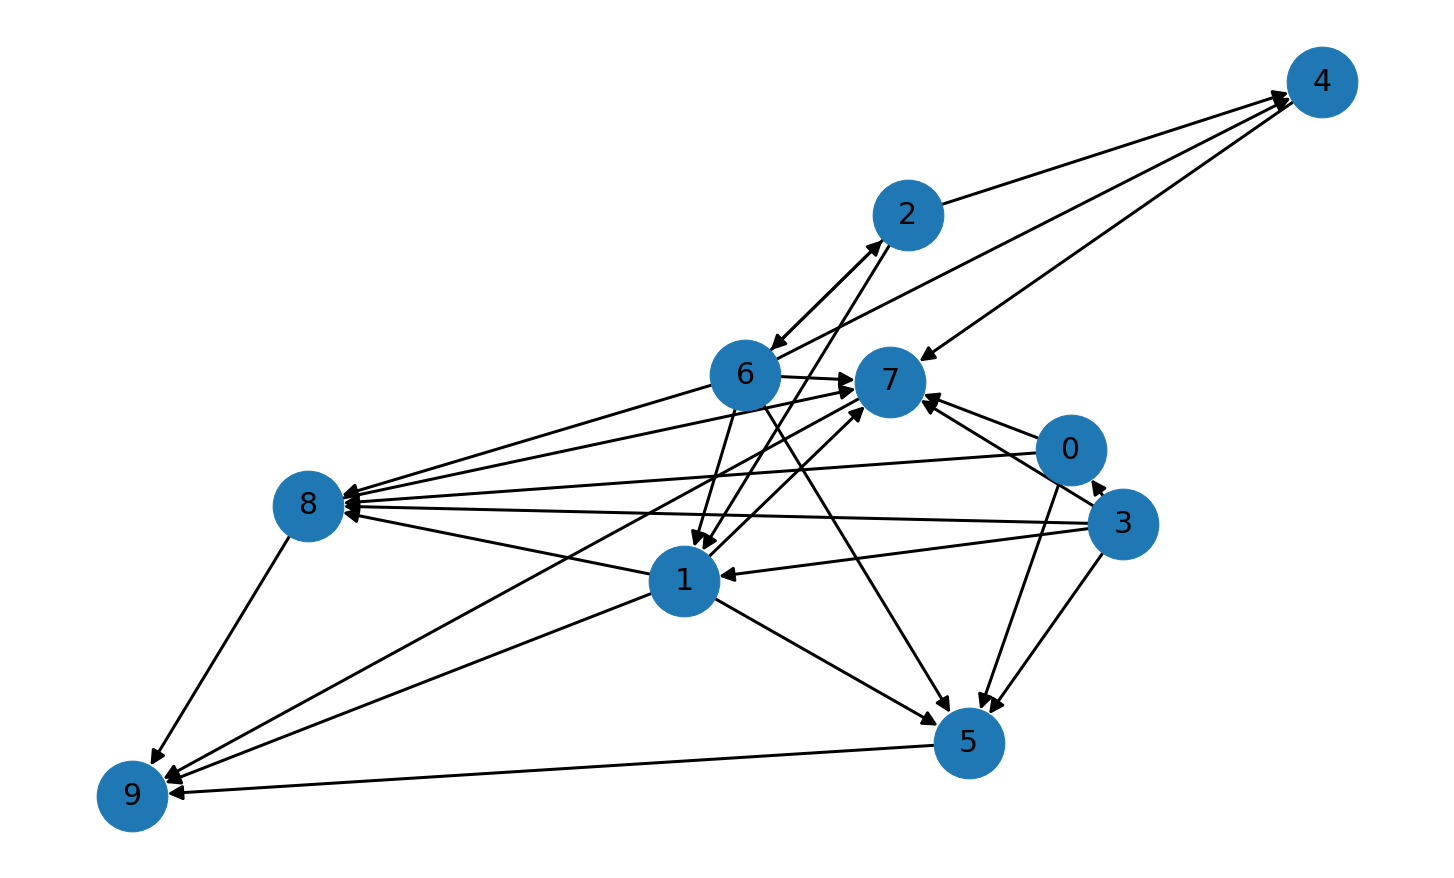

In [78]:
nx_graph = nx.DiGraph(nx_adjmat)
nx.draw(nx_graph, with_labels=True, node_size = 5000, font_size = 30, width = 3, arrowsize = 30)

In [69]:
cpdag_adjmat = get_CPDAG(nx_adjmat)
cpdag_adjmat

array([[0., 0., 0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [70]:
cpdag_adjmat == nx_adjmat

array([[ True,  True,  True, False,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True, False,  True,  True,  True, False,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [71]:
causallearn_cpdag_adjmat = nx_to_causallearn_adjmat(cpdag_adjmat)
causallearn_cpdag_adjmat

array([[ 0.,  0.,  0.,  1.,  0., -1.,  0., -1., -1.,  0.],
       [ 0.,  0.,  1.,  1.,  0., -1.,  1., -1., -1., -1.],
       [ 0., -1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [-1., -1.,  0.,  0.,  0., -1.,  0., -1., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  1., -1.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0., -1.],
       [ 0., -1., -1.,  0., -1., -1.,  0., -1., -1.,  0.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1., -1.],
       [ 1.,  1.,  0.,  1.,  0.,  0.,  1., -1.,  0., -1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.]])